[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Hema\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Hema\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


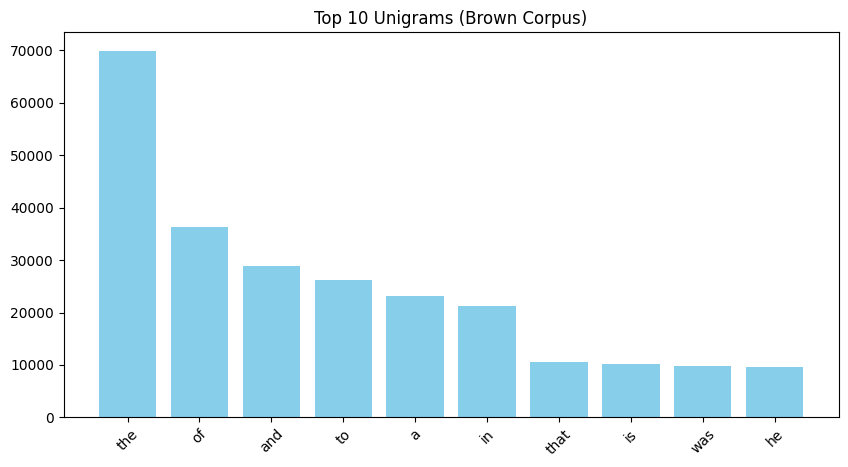

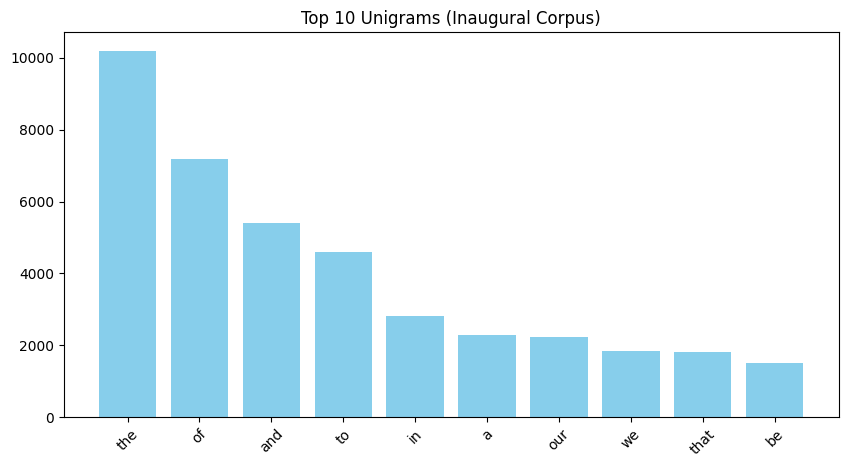

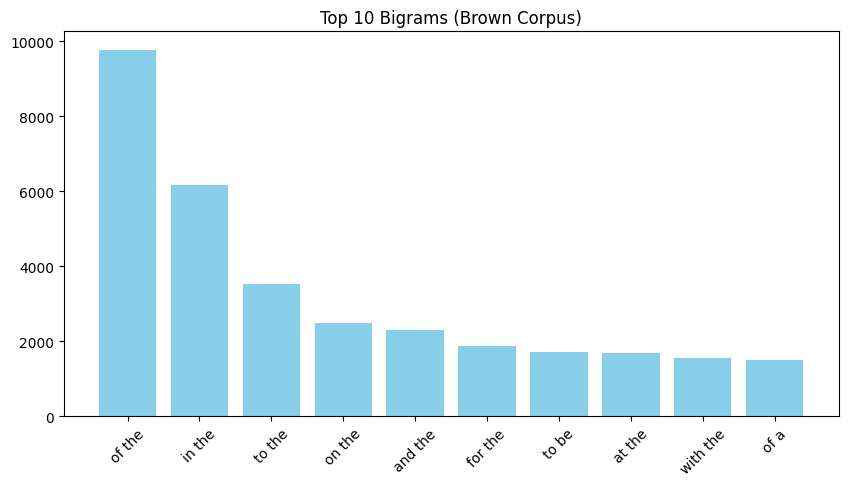

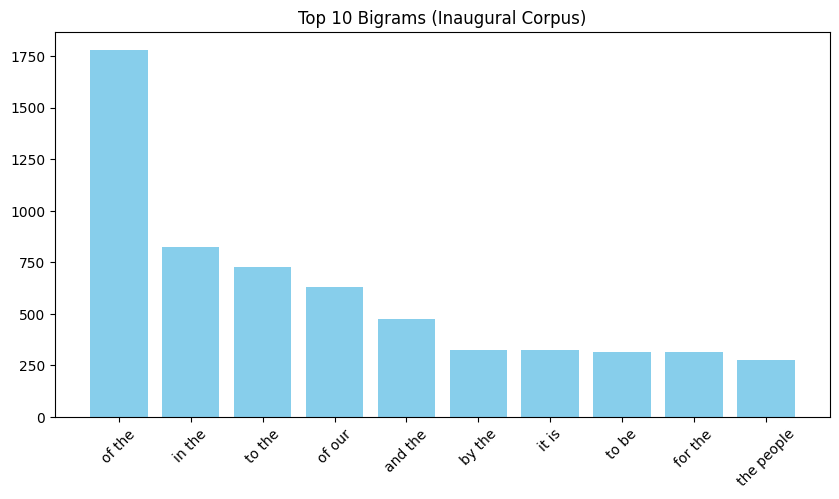

Random Sentence (Brown Corpus): prevents product us and graduated but and she of he
Random Sentence (Inaugural Corpus): duration respects land country be to to a as the
Perplexity for Brown Corpus Test Set: 110032.86464325417
Perplexity for Inaugural Corpus Test Set: 19112.436713622323


In [2]:
import nltk
from nltk.util import ngrams
from nltk.corpus import brown, inaugural
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import string

nltk.download("brown")
nltk.download("inaugural")

# Helper function to extract and preprocess words from a corpus
def extract_words(corpus):
    return [word.lower() for fileid in corpus.fileids() for word in corpus.words(fileid)
            if word.isalpha()]  # Keep only alphabetic words and remove punctuation

# Load two different corpora
corpus1_words = extract_words(brown)
corpus2_words = extract_words(inaugural)

# Function to get n-grams and their frequency counts
def get_ngram_frequencies(words, n):
    ngrams_list = list(ngrams(words, n))
    return Counter(ngrams_list)

# Analyze unigrams and bigrams for both corpora
unigram_freq1 = get_ngram_frequencies(corpus1_words, 1)
unigram_freq2 = get_ngram_frequencies(corpus2_words, 1)
bigram_freq1 = get_ngram_frequencies(corpus1_words, 2)
bigram_freq2 = get_ngram_frequencies(corpus2_words, 2)

# Plot the top 10 most common unigrams and bigrams
def plot_ngram_frequencies(ngram_freq, title):
    most_common = ngram_freq.most_common(10)
    labels, values = zip(*most_common)
    labels = [' '.join(ngram) for ngram in labels]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_ngram_frequencies(unigram_freq1, "Top 10 Unigrams (Brown Corpus)")
plot_ngram_frequencies(unigram_freq2, "Top 10 Unigrams (Inaugural Corpus)")
plot_ngram_frequencies(bigram_freq1, "Top 10 Bigrams (Brown Corpus)")
plot_ngram_frequencies(bigram_freq2, "Top 10 Bigrams (Inaugural Corpus)")

# Generate random sentences based on unigram frequencies
def generate_random_sentence(unigram_freq, length=10):
    unigrams, counts = zip(*unigram_freq.items())
    unigrams = [unigram[0] for unigram in unigrams]  # Extract single word from tuple
    probabilities = np.array(counts) / sum(counts)
    sentence = ' '.join(random.choices(unigrams, probabilities, k=length))
    return sentence

print("Random Sentence (Brown Corpus):", generate_random_sentence(unigram_freq1))
print("Random Sentence (Inaugural Corpus):", generate_random_sentence(unigram_freq2))

# Perplexity calculation
def compute_perplexity(test_set, ngram_freq, n):
    test_ngrams = list(ngrams(test_set, n))
    N = len(test_ngrams)
    total_prob = 0

    for ngram in test_ngrams:
        count = ngram_freq.get(ngram, 1e-10)  # Smoothing by adding a small value to avoid log(0)
        total_prob += np.log2(count / sum(ngram_freq.values()))

    perplexity = 2 ** (-total_prob / N)
    return perplexity

# Example test sets for perplexity computation
test_set1 = corpus1_words[:50]
test_set2 = corpus2_words[:50]

perplexity1 = compute_perplexity(test_set1, bigram_freq1, 2)
perplexity2 = compute_perplexity(test_set2, bigram_freq2, 2)

print("Perplexity for Brown Corpus Test Set:", perplexity1)
print("Perplexity for Inaugural Corpus Test Set:", perplexity2)
